In [ ]:
!pip install numpy==1.26.0  # Ensures NumPy is installed with the specified version.
!pip install pandas==2.0.3  # This specific version is known to be compatible with NumPy 1.26.0
!pip install scikit-learn
#!pip install qiskit_machine_learning
!pip install pillow
#!pip install kagglehub
!pip install monai==1.4.0
!pip install matplotlib
!pip install torch
#!pip install qiskit
!pip install pylatexenc
!pip install torchvision
!pip install ipywidgets
!pip install opencv-python
!pip install tensorflow==2.18.0

In [ ]:
!pip install qiskit==0.44.3 qiskit-machine-learning==0.5.0


In [ ]:
import qiskit
import qiskit_machine_learning
print("Qiskit version:", qiskit.__version__)  # Should be 0.44.3
print("Qiskit Machine Learning version:", qiskit_machine_learning.__version__)  # Should be 0.5.0


Qiskit version: 0.25.3
Qiskit Machine Learning version: 0.5.0


In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from monai.transforms import ScaleIntensity
#import kagglehub
from sklearn import metrics
from sklearn.decomposition import PCA
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from qiskit.circuit import QuantumCircuit
# Instead of importing BaseEstimator directly, import BaseEstimatorV1:


In [ ]:
#from qiskit.primitives import BaseEstimator
#from qiskit_machine_learning.neural_networks import EstimatorQNN
#from qiskit_machine_learning.connectors import TorchConnector
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
import torch
from torch import nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import torchvision.transforms as transforms
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
#from qiskit_machine_learning.neural_networks import EstimatorQNN
#from qiskit_machine_learning.connectors import TorchConnector

In [ ]:
import zipfile
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the zip file path and extraction folder
zip_path = "/content/drive/MyDrive/chest_xrays.zip"
extract_path = "/content/chest_xrays"  # Extracting in Colab's working directory

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete. Files are in:", extract_path)

# List extracted files (Optional)
os.listdir(extract_path)

Extraction complete. Files are in: /content/chest_xrays


['test', '.DS_Store', 'val', 'train']

In [ ]:
train_path_norm = '/content/chest_xrays/train/NORMAL'
train_path_pneu = '/content/chest_xrays/train/PNEUMONIA'
test_path_norm = '/content/chest_xrays/test/NORMAL'
test_path_pneu = '/content/chest_xrays/test/PNEUMONIA'

In [ ]:
val_path_norm = "/content/chest_xrays/val/NORMAL"
val_path_pneu = "/content/chest_xrays/val/PNEUMONIA"


In [ ]:
import os
import shutil
import random

def count_images(directory, extensions=('.jpg', '.png', '.jpeg')):
    """Counts the number of image files in a directory."""
    return len([f for f in os.listdir(directory) if f.lower().endswith(extensions)])

In [ ]:
import os
import shutil
import random

def count_images(directory, extensions=('.jpg', '.png', '.jpeg')):
    """Counts the number of image files in a directory."""
    return len([f for f in os.listdir(directory) if f.lower().endswith(extensions)])

def move_images(src_dir, dest_dir, num_images, extensions=('.jpg', '.png', '.jpeg')):
    """Moves a specified number of image files from source to destination."""
    if not os.path.exists(src_dir):
        print(f"Error: Source directory '{src_dir}' does not exist.")
        return
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)

    images = [f for f in os.listdir(src_dir) if f.lower().endswith(extensions)]
    if len(images) < num_images:
        print(f"Warning: Not enough images in '{src_dir}'. Moving {len(images)} images.")
        num_images = len(images)

    random.shuffle(images)

    for img in images[:num_images]:
        src_path = os.path.join(src_dir, img)
        dest_path = os.path.join(dest_dir, img)
        shutil.move(src_path, dest_path)
    print(f"Moved {num_images} images from '{src_dir}' to '{dest_dir}'.")

train_path_norm = '/content/chest_xrays/train/NORMAL'
train_path_pneu = '/content/chest_xrays/train/PNEUMONIA'
val_path_norm = "/content/chest_xrays/val/NORMAL"
val_path_pneu = "/content/chest_xrays/val/PNEUMONIA"

# Calculate 10% of training set
num_to_move_norm = int(0.10 * count_images(train_path_norm))
num_to_move_pneu = int(0.10 * count_images(train_path_pneu))

# Move images from training to validation
move_images(train_path_norm, val_path_norm, num_to_move_norm)
move_images(train_path_pneu, val_path_pneu, num_to_move_pneu)

# Verify the new counts
print("Updated Length val_path_norm:", count_images(val_path_norm))
print("Updated Length val_path_pneu:", count_images(val_path_pneu))

Moved 134 images from '/content/chest_xrays/train/NORMAL' to '/content/chest_xrays/val/NORMAL'.
Moved 387 images from '/content/chest_xrays/train/PNEUMONIA' to '/content/chest_xrays/val/PNEUMONIA'.
Updated Length val_path_norm: 142
Updated Length val_path_pneu: 395


In [ ]:
print("Length train_path_norm:", count_images(train_path_norm))
print("Length train_path_pneu:", count_images(train_path_pneu))
print("Length val_path_norm:", count_images(val_path_norm))
print("Length val_path_pneu:", count_images(val_path_pneu))
print("Length test_path_norm:", count_images(test_path_norm))
print("Length test_path_pneu:", count_images(test_path_pneu))

Length train_path_norm: 1207
Length train_path_pneu: 3488
Length val_path_norm: 142
Length val_path_pneu: 395
Length test_path_norm: 234
Length test_path_pneu: 390


In [ ]:
xray_image = cv2.imread('/content/chest_xrays/train/PNEUMONIA/person1000_virus_1681.jpeg', cv2.IMREAD_GRAYSCALE)

if xray_image is None:
    print("⚠️ Failed to load image. Check the path or file format.")
else:
    plt.imshow(xray_image, cmap='gray')
    plt.title("X-ray Image")
    plt.axis('off')
    plt.show()


⚠️ Failed to load image. Check the path or file format.


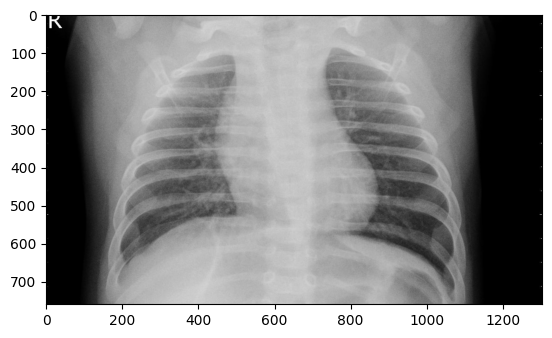

In [ ]:
xray_image = cv2.imread('/content/chest_xrays/train/PNEUMONIA/person1041_virus_1736.jpeg', cv2.IMREAD_GRAYSCALE)
plt.imshow(xray_image, cmap='gray')

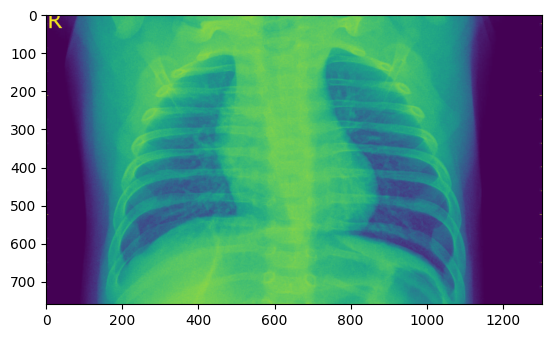

In [ ]:
transform_img = ScaleIntensity(minv=0.0, maxv=1.0)
xray_image_scaled = transform_img(xray_image)
colored_xray = cm.viridis(xray_image_scaled)
plt.imshow(colored_xray)

Found 4695 validated image filenames belonging to 2 classes.


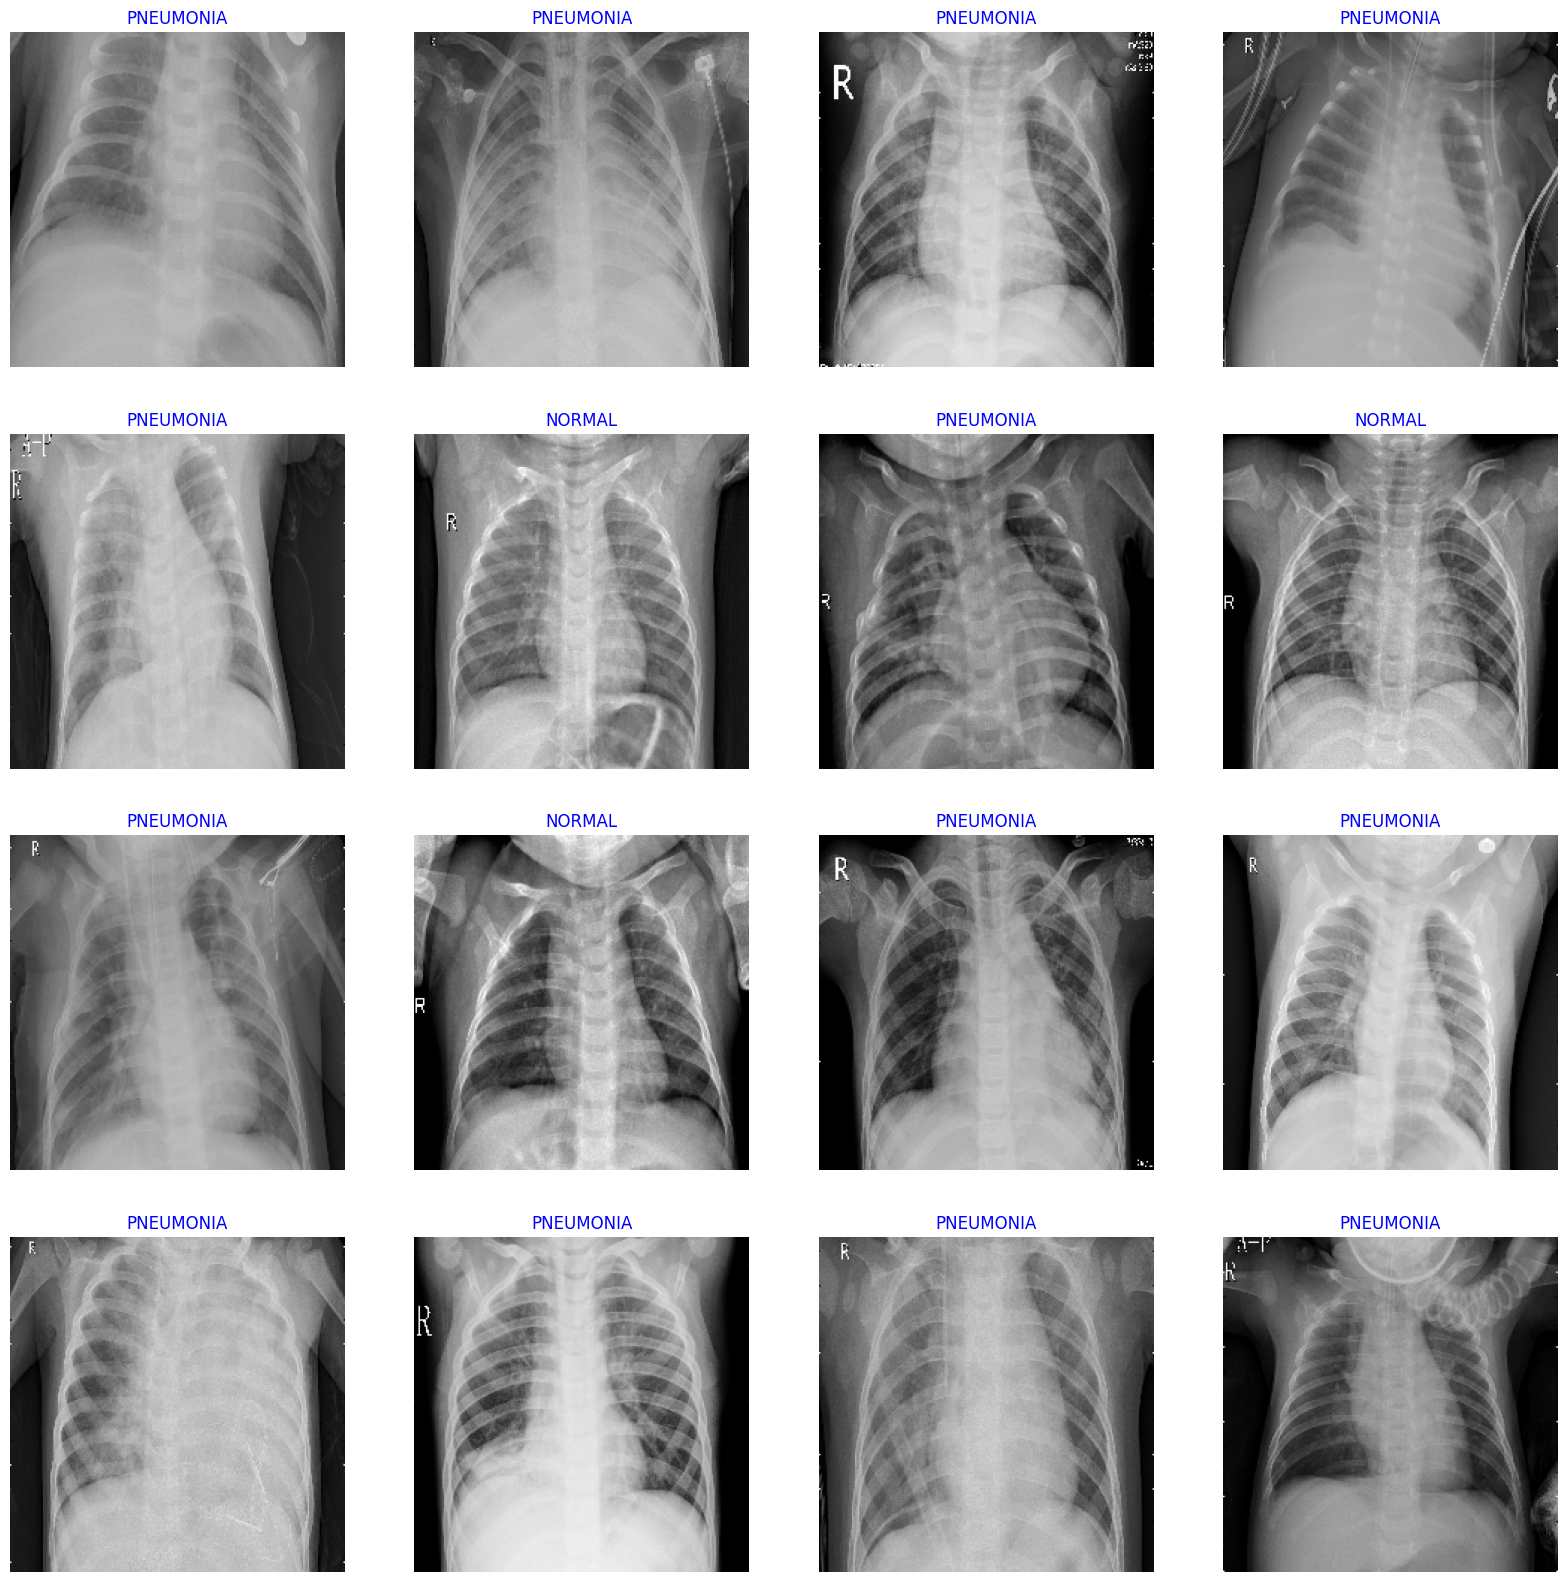

In [ ]:
def create_dataframe_from_directory(directory, label):
    filepaths = [os.path.join(directory, fname) for fname in os.listdir(directory)]
    labels = [label] * len(filepaths)
    return pd.DataFrame({'filepaths': filepaths, 'labels': labels})

df_norm = create_dataframe_from_directory(train_path_norm, 'NORMAL')
df_pneu = create_dataframe_from_directory(train_path_pneu, 'PNEUMONIA')

train_df = pd.concat([df_norm, df_pneu], ignore_index=True)
train_df = train_df.sample(frac=1).reset_index(drop=True)

def scalar(img):
    return img

batch_size = 32
tr_gen = ImageDataGenerator(preprocessing_function=scalar)

train_gen = tr_gen.flow_from_dataframe(
    train_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(224, 224),
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

g_dict = train_gen.class_indices
classes = list(g_dict.keys())
images, labels = next(train_gen)
plt.figure(figsize=(20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color='blue', fontsize=12)
    plt.axis('off')
plt.show()

In [ ]:
img_size = (224, 224)

def load_images_from_folder(folder, label, target_size=img_size):
    """
    Loads images from a given folder and resizes them to the specified target size.
    Converts images to RGB and flattens them into numpy arrays.

    Args:
        folder (str): Path to the folder containing images.
        label (int): Label associated with the images in the folder.
        target_size (tuple): Target size to which images will be resized (width, height).

    Returns:
        tuple: A list of image data and their corresponding labels.
    """
    data, labels = [], []
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        try:
            img = Image.open(img_path).convert("RGB").resize(target_size)
            data.append(np.array(img).flatten())
            labels.append(label)
        except Exception as e:
            print(f"Error loading image {img_name}: {e}")
    return data, labels

def load_all_data(path, label, target_size=(256, 256)):
    """
    Loads all images from a folder.
    Ensures images are resized to the specified target size.

    Args:
        path (str): Path to the folder containing images.
        label (int): Label associated with the images in the folder.
        target_size (tuple): Target size to which images will be resized (width, height).

    Returns:
        tuple: A list of all image data and their corresponding labels.
    """
    return load_images_from_folder(path, label, target_size)

In [ ]:
import numpy as np
from imblearn.over_sampling import SMOTE

# Load the FULL dataset
train_data_norm, train_labels_norm = load_all_data(train_path_norm, 0, target_size=img_size)
train_data_pneu, train_labels_pneu = load_all_data(train_path_pneu, 1, target_size=img_size)

X_train = np.array(train_data_norm + train_data_pneu)
y_train = np.array(train_labels_norm + train_labels_pneu)

# Apply SMOTE to balance training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train.reshape(len(X_train), -1), y_train)
X_train = X_train.reshape(-1, img_size[0], img_size[1], 3)  # Reshape back to image format

# Load the FULL validation and test sets
val_data_norm, val_labels_norm = load_all_data(val_path_norm, 0, target_size=img_size)
val_data_pneu, val_labels_pneu = load_all_data(val_path_pneu, 1, target_size=img_size)

X_val = np.array(val_data_norm + val_data_pneu)
y_val = np.array(val_labels_norm + val_labels_pneu)

test_data_norm, test_labels_norm = load_all_data(test_path_norm, 0, target_size=img_size)
test_data_pneu, test_labels_pneu = load_all_data(test_path_pneu, 1, target_size=img_size)

X_test = np.array(test_data_norm + test_data_pneu)
y_test = np.array(test_labels_norm + test_labels_pneu)


Error loading image .DS_Store: cannot identify image file '/content/chest_xrays/train/NORMAL/.DS_Store'
Error loading image .DS_Store: cannot identify image file '/content/chest_xrays/train/PNEUMONIA/.DS_Store'
Error loading image .DS_Store: cannot identify image file '/content/chest_xrays/val/NORMAL/.DS_Store'
Error loading image .DS_Store: cannot identify image file '/content/chest_xrays/val/PNEUMONIA/.DS_Store'


In [ ]:
print(len(X_train), len(y_train))
print(len(X_val), len(y_val))
print(len(X_test), len(y_test))


6976 6976
537 537
624 624


In [ ]:
print(y_train.shape)  # Check if it is (N,) or (N, C)


(6976,)


In [ ]:
from collections import Counter

print("Training distribution:", Counter(y_train))
print("Validation distribution:", Counter(y_val))
print("Test distribution:", Counter(y_test))


Training distribution: Counter({0: 3488, 1: 3488})
Validation distribution: Counter({1: 395, 0: 142})
Test distribution: Counter({1: 390, 0: 234})


In [ ]:
from sklearn.utils import resample
import numpy as np

def balance_by_upsampling(X, y):
    # Separate classes
    X_0 = X[np.array(y) == 0]
    X_1 = X[np.array(y) == 1]

    if len(X_0) > len(X_1):
        X_minority, X_majority = X_1, X_0
        y_minority_val = 1
        y_majority_val = 0
    else:
        X_minority, X_majority = X_0, X_1
        y_minority_val = 0
        y_majority_val = 1

    # Upsample the minority class
    X_minority_upsampled = resample(
        X_minority,
        replace=True,
        n_samples=len(X_majority),
        random_state=42
    )

    y_minority = [y_minority_val] * len(X_majority)
    y_majority = [y_majority_val] * len(X_majority)

    # Combine
    X_bal = np.concatenate([X_majority, X_minority_upsampled])
    y_bal = np.array(y_majority + y_minority)

    # Shuffle
    idx = np.random.permutation(len(y_bal))
    return X_bal[idx], y_bal[idx]

# Apply to validation and test sets
X_val_bal, y_val_bal = balance_by_upsampling(X_val, y_val)
X_test_bal, y_test_bal = balance_by_upsampling(X_test, y_test)

from collections import Counter
print("Validation distribution after upsampling:", Counter(y_val_bal))
print("Test distribution after upsampling:", Counter(y_test_bal))


Validation distribution after upsampling: Counter({1: 395, 0: 395})
Test distribution after upsampling: Counter({1: 390, 0: 390})


In [ ]:
# Let's see the shape of one validation sample
print(X_val.shape)  # Should be (N, H*W*C)


(537, 150528)


In [ ]:

flat_dim = X_val.shape[1]  # 208800
for c in [1, 3]:
    side = int(np.sqrt(flat_dim / c))
    if side * side * c == flat_dim:
        print(f"Detected image shape: ({side}, {side}, {c})")
        break


Detected image shape: (224, 224, 3)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Fix reshaping for 224x224x3 images
def ensure_4d(X):
    if len(X.shape) == 2:  # Flattened
        return X.reshape(-1, 224, 224, 3)
    elif len(X.shape) == 3:
        return X[..., np.newaxis]  # If grayscale
    return X  # Already good

# Ensure correct shape for each
X_train = ensure_4d(X_train)
X_val   = ensure_4d(X_val)
X_test  = ensure_4d(X_test)

# Merge all sets to resample stratified splits
X_combined = np.concatenate([X_train, X_val, X_test])
y_combined = np.concatenate([y_train, y_val, y_test])

# New split: 80% train, 10% val, 10% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X_combined, y_combined, test_size=0.1, stratify=y_combined, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1111, stratify=y_temp, random_state=42)
# (0.1111 of 90% ≈ 10%)

# Final check
from collections import Counter
print("Train:", X_train.shape, Counter(y_train))
print("Val:  ", X_val.shape, Counter(y_val))
print("Test: ", X_test.shape, Counter(y_test))


Train: (6509, 224, 224, 3) Counter({1: 3418, 0: 3091})
Val:   (814, 224, 224, 3) Counter({1: 428, 0: 386})
Test:  (814, 224, 224, 3) Counter({1: 427, 0: 387})


In [ ]:
y_train = y_train.astype(int)
y_val = y_val.astype(int)
y_test = y_test.astype(int)

In [ ]:
abyifykd

In [ ]:
!pip uninstall qiskit qiskit-machine-learning -y
!pip install qiskit qiskit-machine-learning


Found existing installation: qiskit 2.0.0
Uninstalling qiskit-2.0.0:
  Successfully uninstalled qiskit-2.0.0
Found existing installation: qiskit-machine-learning 0.8.2
Uninstalling qiskit-machine-learning-0.8.2:
  Successfully uninstalled qiskit-machine-learning-0.8.2
  Using cached qiskit-2.0.0-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached qiskit_machine_learning-0.8.2-py3-none-any.whl.metadata (13 kB)
Using cached qiskit-2.0.0-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.5 MB)
Using cached qiskit_machine_learning-0.8.2-py3-none-any.whl (231 kB)


In [ ]:
!pip install qiskit-optimization --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.5/645.5 kB 42.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 140.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 155.7 MB/s eta 0:00:00
  Created wheel for docplex: filename=docplex-2.29.241-py3-none-any.whl size=685423 sha256=faf117539266795bd8ca714a55815f99495fe598d7b13ad6ae4fe63d048ed481
  Stored in directory: /tmp/pip-ephem-wheel-cache-vstt9hus/wheels/00/4f/37/fbc42df1f9b6786024d4b39c81f0b373c84e6fab9e18513fc2
Successfully built docplex


In [ ]:
import qiskit
import qiskit_machine_learning
print(qiskit.__version__)
print(qiskit_machine_learning.__version__)


0.25.3
0.5.0


In [ ]:
from qiskit.primitives import *
print(dir(qiskit.primitives))


['BackendEstimatorV2', 'BackendSamplerV2', 'BaseEstimatorV1', 'BaseEstimatorV2', 'BasePrimitiveJob', 'BaseSamplerV1', 'BaseSamplerV2', 'BindingsArrayLike', 'BitArray', 'DataBin', 'EstimatorPubLike', 'EstimatorResult', 'ObservableLike', 'ObservablesArrayLike', 'PrimitiveJob', 'PrimitiveResult', 'PubResult', 'SamplerPubLike', 'SamplerPubResult', 'SamplerResult', 'StatevectorEstimator', 'StatevectorSampler', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'backend_estimator_v2', 'backend_sampler_v2', 'base', 'containers', 'primitive_job', 'statevector_estimator', 'statevector_sampler', 'utils']


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import psutil

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

from qiskit import QuantumCircuit
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.primitives import Estimator

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import numpy as np
import psutil
import torchvision.transforms as transforms
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes

from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.connectors import TorchConnector


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# 1. Create Quantum Neural Network (QNN)
def create_qnn():
    num_qubits = 3
    feature_map = ZZFeatureMap(feature_dimension=num_qubits)
    ansatz = RealAmplitudes(num_qubits=num_qubits, reps=2)
    qc = QuantumCircuit(num_qubits)
    qc.compose(feature_map, inplace=True)
    qc.compose(ansatz, inplace=True)
    qnn = EstimatorQNN(
        circuit=qc,
        input_params=feature_map.parameters,
        weight_params=ansatz.parameters,
        input_gradients=True
    )
    return TorchConnector(qnn)

# 2. Custom Dataset
class ImageDataset(Dataset):
    def __init__(self, X_data, y_data, train=True):
        self.X_data = X_data

        # Only apply argmax if y_data is one-hot encoded
        if len(y_data.shape) > 1 and y_data.shape[1] > 1:
            self.y_data = np.argmax(y_data, axis=1)
        else:
            self.y_data = y_data  # Already in label format

        self.transform = transforms.Compose([
            transforms.ToPILImage(),
            transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(degrees=15),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
        ]) if train else transforms.Compose([
            transforms.ToPILImage(),
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
        ])

    def __len__(self):
        return len(self.X_data)

    def __getitem__(self, index):
        image = self.X_data[index].reshape(img_size[0], img_size[1], 3)
        X_item = self.transform(image)
        y_item = torch.tensor(self.y_data[index], dtype=torch.long)
        return X_item, y_item

# 3. Quantum CNN Model
class QuantumCNN(nn.Module):
    def __init__(self, quantum_layer, input_shape=(3, 224, 224)):
        super(QuantumCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, 3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 64, 3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64, 128, 3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(2, 2)

        self.quantum_layer = quantum_layer
        self.flattened_size = self._get_flattened_size(input_shape)

        self.quantum_input_fc = nn.Linear(self.flattened_size, 3)  # Map image features to quantum input

        quantum_output_size = 1  # EstimatorQNN returns a scalar per input
        self.fc1 = nn.Linear(self.flattened_size + quantum_output_size, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 2)
        self.dropout = nn.Dropout(0.5)

    def _get_flattened_size(self, input_shape):
        dummy_input = torch.zeros(1, *input_shape)
        x = self.pool(F.relu(self.bn1(self.conv1(dummy_input))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = self.pool(F.relu(self.bn4(self.conv4(x))))
        return torch.flatten(x, start_dim=1).size(1)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = self.pool(F.relu(self.bn4(self.conv4(x))))
        x = torch.flatten(x, start_dim=1)

        # Generate quantum input from image features
        quantum_input = torch.tanh(self.quantum_input_fc(x))  # [batch_size, 3]
        quantum_out = self.quantum_layer(quantum_input).float().view(x.size(0), -1)

        x = torch.cat((x, quantum_out), dim=1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 4. Training Function
def fit_quantum_model(model, X_train, y_train, X_val, y_val, epochs=15, batch_size=16, patience=5):
    model.to(device)
    train_loader = DataLoader(ImageDataset(X_train, y_train, train=True), batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(ImageDataset(X_val, y_val, train=False), batch_size=batch_size, shuffle=False)
    optimizer = optim.Adam(model.parameters(), lr=0.0003, weight_decay=1e-4)
    criterion = nn.CrossEntropyLoss()
    best_val_loss, patience_counter = float("inf"), 0

    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs} | RAM Usage: {psutil.virtual_memory().percent}%")
        model.train()
        train_loss, correct_train, total_train = 0, 0, 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device).long()
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            train_loss += loss.item()
            correct_train += (outputs.argmax(dim=1) == y_batch).sum().item()
            total_train += y_batch.size(0)
        avg_train_loss = train_loss / len(train_loader)
        avg_train_acc = correct_train / total_train
        model.eval()
        val_loss, correct_val, total_val = 0, 0, 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device).long()
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
                correct_val += (outputs.argmax(dim=1) == y_batch).sum().item()
                total_val += y_batch.size(0)
        avg_val_loss = val_loss / len(val_loader)
        avg_val_acc = correct_val / total_val
        print(f"Train Loss: {avg_train_loss:.4f}, Train Acc: {avg_train_acc:.4f} | Val Loss: {avg_val_loss:.4f}, Val Acc: {avg_val_acc:.4f}")
        if avg_val_loss < best_val_loss:
            best_val_loss, patience_counter = avg_val_loss, 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping triggered.")
                break

# 5. Run it
quantum_layer = create_qnn()
quantum_model = QuantumCNN(quantum_layer).to(device)
fit_quantum_model(quantum_model, X_train, y_train, X_val, y_val, epochs=15)


Using device: cuda
Epoch 1/15 | RAM Usage: 59.3%
Train Loss: 0.3512, Train Acc: 0.8646 | Val Loss: 0.2544, Val Acc: 0.9005
Epoch 2/15 | RAM Usage: 62.1%
Train Loss: 0.2537, Train Acc: 0.9158 | Val Loss: 0.1883, Val Acc: 0.9263
Epoch 3/15 | RAM Usage: 62.3%
Train Loss: 0.2307, Train Acc: 0.9201 | Val Loss: 0.1489, Val Acc: 0.9373
Epoch 4/15 | RAM Usage: 62.6%
Train Loss: 0.2047, Train Acc: 0.9301 | Val Loss: 0.1701, Val Acc: 0.9324
Epoch 5/15 | RAM Usage: 62.6%
Train Loss: 0.1779, Train Acc: 0.9395 | Val Loss: 0.2054, Val Acc: 0.9324
Epoch 6/15 | RAM Usage: 62.4%
Train Loss: 0.1807, Train Acc: 0.9401 | Val Loss: 0.2219, Val Acc: 0.9226
Epoch 7/15 | RAM Usage: 62.7%


KeyboardInterrupt: 


✅ Test Accuracy: 0.9324


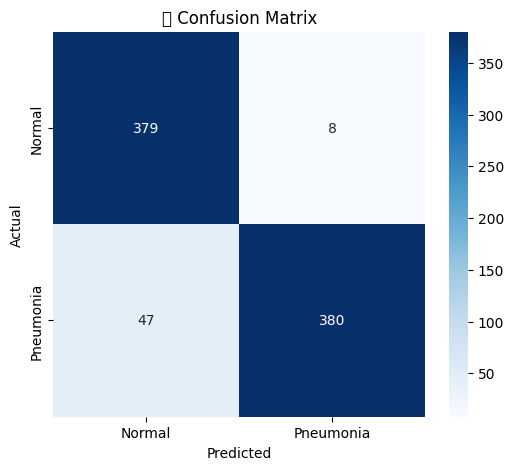


🧠 Classification Report:
               precision    recall  f1-score   support

      Normal       0.89      0.98      0.93       387
   Pneumonia       0.98      0.89      0.93       427

    accuracy                           0.93       814
   macro avg       0.93      0.93      0.93       814
weighted avg       0.94      0.93      0.93       814



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Set to evaluation mode
quantum_model.eval()

# Create test loader
test_loader = DataLoader(ImageDataset(X_test, y_test, train=False), batch_size=16, shuffle=False)

# Initialize containers
all_preds = []
all_labels = []

# Loop through test data
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device).long()
        outputs = quantum_model(X_batch)
        preds = outputs.argmax(dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())

# ✅ Accuracy
accuracy = np.mean(np.array(all_preds) == np.array(all_labels))
print(f"\n✅ Test Accuracy: {accuracy:.4f}")

# 📊 Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Pneumonia"], yticklabels=["Normal", "Pneumonia"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("🧩 Confusion Matrix")
plt.show()

# 🧠 Classification Report
report = classification_report(all_labels, all_preds, target_names=["Normal", "Pneumonia"])
print("\n🧠 Classification Report:\n", report)


In [ ]:
import torch

# Define the path where you want to save the model
model_path = "/content/drive/My Drive/model2.pth"

# Save the model state dictionary
torch.save(quantum_model.state_dict(), model_path)

print(f"Model saved to {model_path}")


Model saved to /content/drive/My Drive/model2.pth
